# Report: Analyzing the Dominance of Road Transport in Total Energy Consumption and Its Climate Implications
** Arezoo Shafayani **
** 01.07.2024 **



* [Introduction](#Introduction)
  * [Main Question](#Main-Question)
  * [Description] (#Description)
* [Data Sources] (#Data-Sources)
* [Method](#Method)
  * [Pipeline] (#Pipeline)
  * [Result and Limitations] (#Result-Limitations) 
* [Analysis] (#Analysis)
* [Conclusion](#Conclusion)
* [Refernces](#Refernces)

# Introduction

## Question: 
How does the energy consumption in road transport compare to the total energy consumption in the transport sector across different countries over the years, and what are the potential climate implications of this dominance?


## Description: 

The transportation sector is a major contributor to global energy consumption and greenhouse gas emissions. Within this sector, road transport stands out due to its extensive use of fossil fuels and its impact on climate change. This report investigates the dominance of road transport in the overall energy consumption of the transport sector across different countries over the years, using two key datasets. The aim is to quantify road transport's energy consumption relative to total transport energy consumption and discuss the potential climate implications of this dominance.


# Data Sources

## Data Source1: Final energy consumption in transport by type of fuel

* Metadata URL: https://ec.europa.eu/eurostat/databrowser/view/ten00126/default/table?lang=en&category=cli.cli_dri.cli_dri_tran
* Data URL: https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/ten00126/?format=SDMX-CSV&compressed=true
* Data Type: CSV
* Period: 2011 to 2022
* Quality: The data is high-quality and reliable, coming from Eurostat, which is known for its rigorous data collection and validation * processes.
* License: This data is under the standard open-data license from Eurostat, which allows usage with proper attribution.
* Link (License):  https://ec.europa.eu/eurostat/about-us/policies/copyright
* Description: This dataset provides a comprehensive view of energy consumption across various transport modes, including road, rail, domestic aviation, and navigation, while excluding international operations and non-transport energy uses.


## Datasource2: Final energy consumption in road transport by type of fuel

* Metadata URL: https://ec.europa.eu/eurostat/databrowser/view/ten00127/default/table?lang=en&category=cli.cli_dri.cli_dri_tran
* Data URL: https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/ten00127/?format=SDMX-CSV&compressed=true
* Data Type: CSV
* Period: 2011 to 2022
* Quality: As with Datasource1, this data is of high quality and reliability, provided by Eurostat.
* License: The same open-data license from Eurostat applies.
* Link(License):  https://ec.europa.eu/eurostat/about-us/policies/copyright
* Description: This dataset focuses on energy consumption within road transport, covering vehicles like cars, buses, trucks, and emergency vehicles on public roads. 


In [5]:
import pandas as pd
import sqlite3

# Function to load data from SQLite database
def load_data(db_path, query):

    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)

    # Read the data from SQLite tables
    df = pd.read_sql_query(query, conn)
    conn.close()

    return df


# Load data
df_total = load_data('../data/energy_consumption.db',
                     'SELECT * FROM FECT_Total')

df_road = load_data('../data/energy_consumption.db', 'SELECT * FROM FECT_Road')


# Convert time_period to datetime and extract the year
df_total['year'] = pd.to_datetime(df_total['time_period']).dt.year
df_road['year'] = pd.to_datetime(df_road['time_period']).dt.year


# Merging the two summaries for comparative analysis
comparative_summary = df_total.join(
    df_road, lsuffix='_total', rsuffix='_road')


# Displaying the comparative summary
comparative_summary.head()


# Show Some rows of dataset_1
print("Data Source1: Final energy consumption in transport by type of fuel:")
display(df_total.head())

print("FECT_Total(Datasource1) Data Columns:")
print(df_total.columns.tolist())


# Show Some rows of dataset_2
print("Datasource2: Final energy consumption in road transport by type of fuel")
display(df_road.head())

print("FECT_Road (Datasource2) Data Columns:")
print(df_road.columns.tolist())

Data Source1: Final energy consumption in transport by type of fuel:


,last_updated_timestamp,data_collection_frequency,energy_balance_category,specific_energy_product,unit_of_measurement,geographic_area,time_period,energy_consumption_value,year
0,24/05/24 23:00:00,A,FC_TRA_E,E7000,KTOE,AL,2011-01-01 00:00:00,0.0,2011
1,24/05/24 23:00:00,A,FC_TRA_E,E7000,KTOE,AL,2012-01-01 00:00:00,0.0,2012
2,24/05/24 23:00:00,A,FC_TRA_E,E7000,KTOE,AL,2013-01-01 00:00:00,0.0,2013
3,24/05/24 23:00:00,A,FC_TRA_E,E7000,KTOE,AL,2014-01-01 00:00:00,0.0,2014
4,24/05/24 23:00:00,A,FC_TRA_E,E7000,KTOE,AL,2015-01-01 00:00:00,0.0,2015


FECT_Total(Datasource1) Data Columns:
['last_updated_timestamp', 'data_collection_frequency', 'energy_balance_category', 'specific_energy_product', 'unit_of_measurement', 'geographic_area', 'time_period', 'energy_consumption_value', 'year']
Datasource2: Final energy consumption in road transport by type of fuel


,last_updated_timestamp,data_collection_frequency,energy_balance_category,specific_energy_product,unit_of_measurement,geographic_area,time_period,energy_consumption_value,year
0,24/05/24 23:00:00,A,FC_TRA_ROAD_E,E7000,KTOE,AL,2011-01-01 00:00:00,0.0,2011
1,24/05/24 23:00:00,A,FC_TRA_ROAD_E,E7000,KTOE,AL,2012-01-01 00:00:00,0.0,2012
2,24/05/24 23:00:00,A,FC_TRA_ROAD_E,E7000,KTOE,AL,2013-01-01 00:00:00,0.0,2013
3,24/05/24 23:00:00,A,FC_TRA_ROAD_E,E7000,KTOE,AL,2014-01-01 00:00:00,0.0,2014
4,24/05/24 23:00:00,A,FC_TRA_ROAD_E,E7000,KTOE,AL,2015-01-01 00:00:00,0.0,2015


FECT_Road (Datasource2) Data Columns:
['last_updated_timestamp', 'data_collection_frequency', 'energy_balance_category', 'specific_energy_product', 'unit_of_measurement', 'geographic_area', 'time_period', 'energy_consumption_value', 'year']


# Method

## Pipeline:

The data pipeline extracts data from two online sources using Python. It downloads gzipped CSV files, decompresses them, and processes the data with pandas before storing it in an SQLite database.

![alt text](Pipeline-2.png)

## Technology Used
* Python: Core programming language
* Libraries: requests for data retrieval, pandas for data manipulation, sqlite3 for data storage

## Transformation and Cleaning Process:
* Data Downloading and Unzipping: Used the Requests library to download gzipped CSV files and Pandas to read the decompressed content.
* Column Dropping: Removed unnecessary columns ('DATAFLOW', 'OBS_FLAG') to streamline the datasets.
* Date Conversion: Converted the 'TIME_PERIOD' column to date time format for consistency in time-based analyses.
* Column Renaming: Renamed columns for better readability and understanding of the data.
* Data Saving: Saved the cleaned and transformed data into an SQLite database for efficient querying and analysis.

## Error Handling: 
* Implemented error handling for data downloading and reading processes to handle potential network issues or data format changes.
* The pipeline includes error handling mechanisms such as checking the response status of data download requests and handling missing or malformed data gracefully.

# Result and Limitations

## Output Data:
* Structure: The final output is stored in an SQLite database (energy_consumption.db) with two tables: FECT_Total and FECT_Road. Each table contains columns like 'last_updated_timestamp', 'data_collection_frequency', 'energy_balance_category', 'specific_energy_product', 'unit_of_measurement', 'geographic_area', 'time_period', and 'energy_consumption_value'.
* Quality: The quality of the output data is high, maintaining the integrity and reliability of the original datasets from Eurostat.
* Data Format: SQLite was chosen as the output format due to its efficiency in handling large datasets, ease of integration with Python for further analysis, and robustness in querying capabilities.

## Critical Reflection:
### Potential Issues:
 * Data Completeness: While the data is comprehensive, there might be missing entries for certain years or countries that could affect longitudinal analyses.
 * Update Frequency: The data might not be updated in real-time, which could lead to lag in reflecting the latest trends and patterns.


# Analysis

## Comparative Analysis of Energy Consumption Between Total Transport and Road Transport

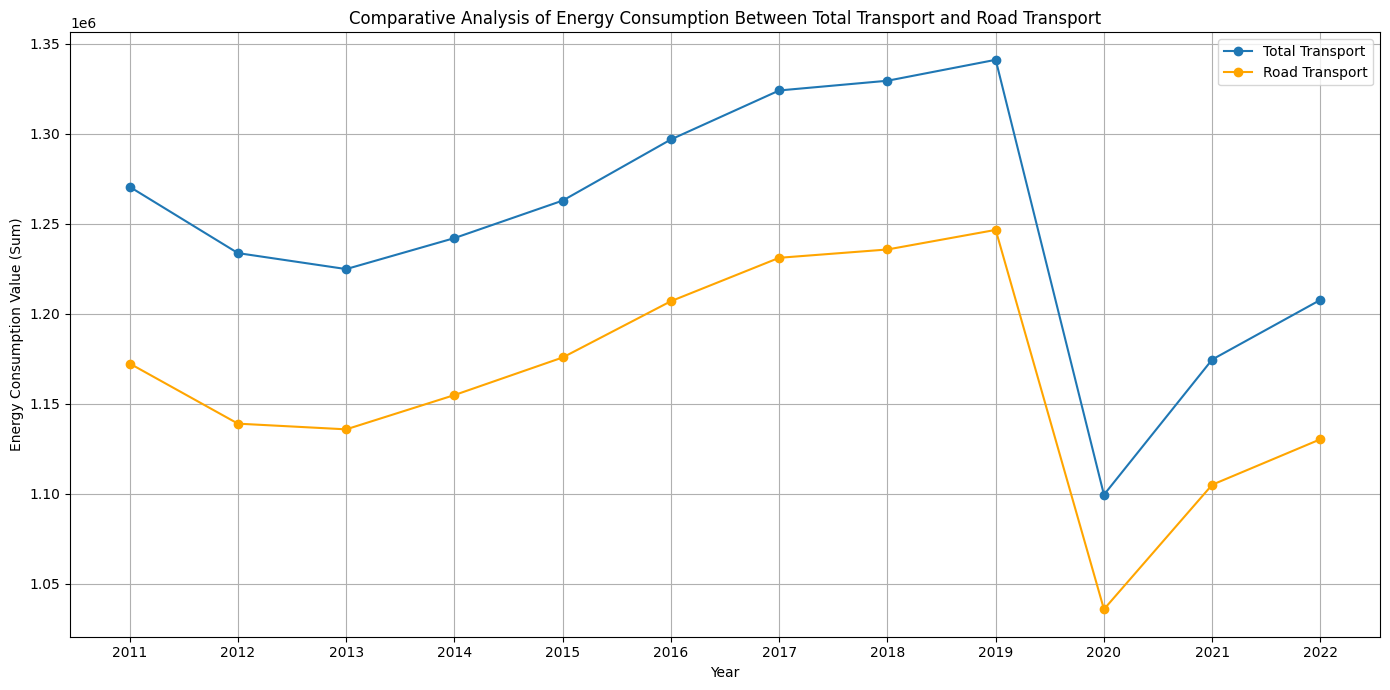

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
fect_total_df = df_total
fect_road_df = df_road

# Aggregate data by year
total_consumption_summary = fect_total_df.groupby(fect_total_df['time_period'].str[:4]).agg({
    'energy_consumption_value': ['sum', 'mean', 'median']
})

road_consumption_summary = fect_road_df.groupby(fect_road_df['time_period'].str[:4]).agg({
    'energy_consumption_value': ['sum', 'mean', 'median']
})

# Merging the two summaries for comparative analysis
comparative_summary = total_consumption_summary.join(
    road_consumption_summary, lsuffix='_total', rsuffix='_road')

# Visualization: Comparative Analysis of Energy Consumption
plt.figure(figsize=(14, 7))

# Plot the sum of energy consumption values
plt.plot(comparative_summary.index, comparative_summary[(
    'energy_consumption_value_total', 'sum')], marker='o', label='Total Transport')
plt.plot(comparative_summary.index, comparative_summary[(
    'energy_consumption_value_road', 'sum')], marker='o', color='orange', label='Road Transport')

plt.title('Comparative Analysis of Energy Consumption Between Total Transport and Road Transport')
plt.xlabel('Year')
plt.ylabel('Energy Consumption Value (Sum)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and display the plot
plt.savefig('comparative_analysis.png')
plt.show()

### Overall Trends:

Both the total transport and road transport energy consumption show a generally increasing trend from 2011 to around 2018.
A significant drop is observed in 2019 for both total and road transport energy consumption, followed by a further sharp decline in 2020.

### Road Transport Dominance:

Road transport consistently constitutes a significant portion of the total transport energy consumption throughout the years.
Despite the fluctuations, the energy consumption trends for road transport closely follow the trends for total transport, indicating that road transport is a major contributor to the overall transport energy consumption.

### Impact of External Factors:

The sharp decline in energy consumption in 2020 can likely be attributed to external factors, such as the global COVID-19 pandemic, which led to reduced transport activities due to lockdowns and travel restrictions.
The recovery observed in 2021 and 2022 indicates a rebound in transport activities as restrictions were lifted and normal activities resumed.

### Fluctuations and Recovery:

The period from 2011 to 2014 shows a slight decline in energy consumption, which could be due to improvements in fuel efficiency and the adoption of energy-saving technologies.
From 2014 to 2018, there is a steady increase in energy consumption, possibly due to increased transport activities and economic growth.
The dip in 2019 followed by a significant drop in 2020 suggests an abrupt disruption in transport activities, with a gradual recovery beginning in 2021.

## Total Transport Fuel Type Distribution (2019-2022)

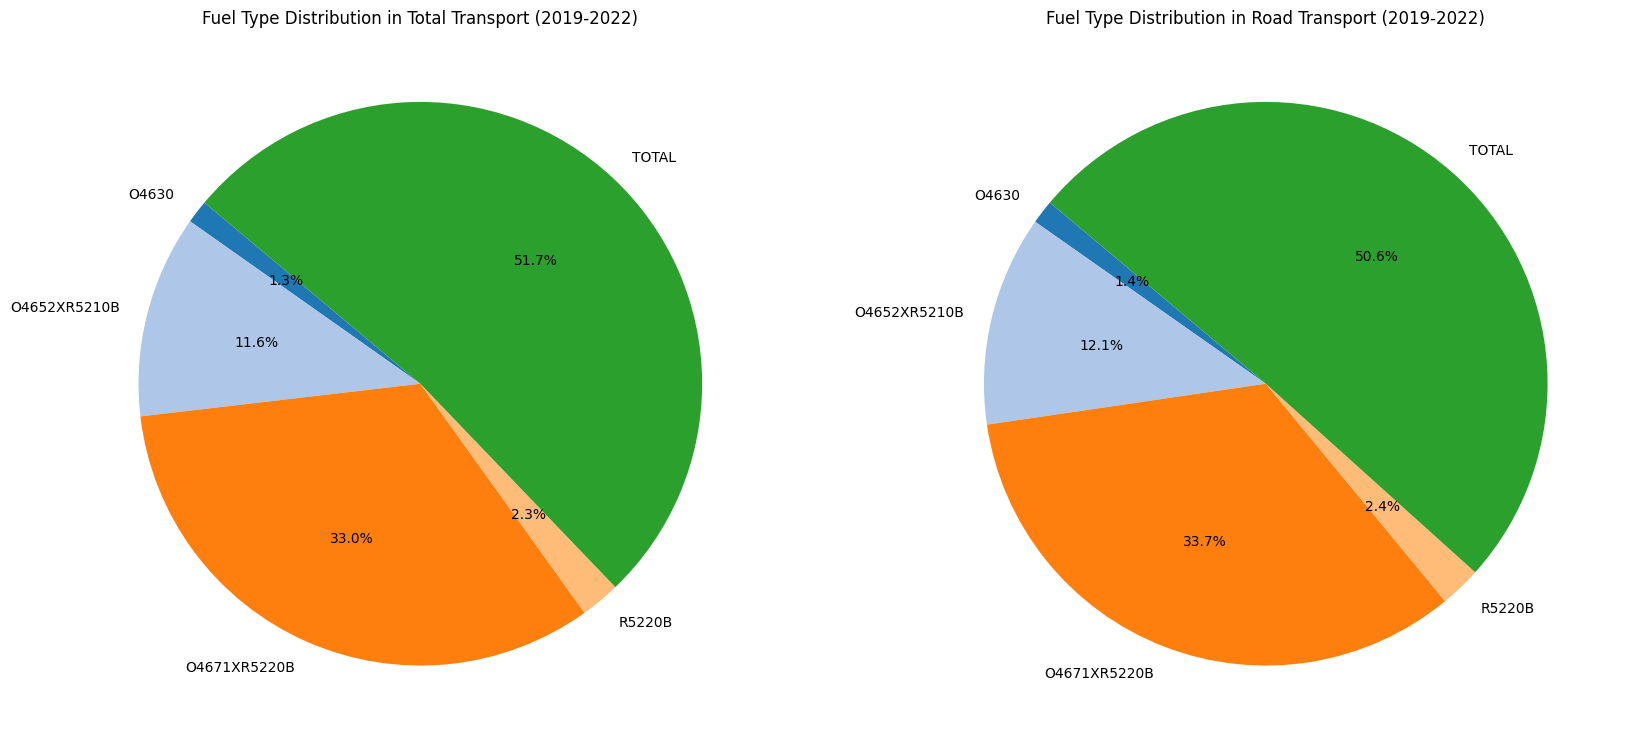

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Load data
fect_total_df = load_data('../data/energy_consumption.db',
                          'SELECT * FROM FECT_Total')
fect_road_df = load_data(
    '../data/energy_consumption.db', 'SELECT * FROM FECT_Road')

# Filter data for the years 2019, 2020, 2021, and 2022
years = ['2019', '2020', '2021', '2022']
filtered_total_df = fect_total_df[fect_total_df['time_period'].str[:4].isin(
    years)]
filtered_road_df = fect_road_df[fect_road_df['time_period'].str[:4].isin(
    years)]

# Aggregate data by specific energy product (fuel type)
total_fuel_type_summary = filtered_total_df.groupby('specific_energy_product').agg({
    'energy_consumption_value': 'sum'
}).reset_index()

road_fuel_type_summary = filtered_road_df.groupby('specific_energy_product').agg({
    'energy_consumption_value': 'sum'
}).reset_index()

# Calculate total consumption for filtering
total_consumption_total = total_fuel_type_summary['energy_consumption_value'].sum(
)
total_consumption_road = road_fuel_type_summary['energy_consumption_value'].sum(
)

# Filter out fuel types with less than 1% of total consumption
total_fuel_type_summary = total_fuel_type_summary[total_fuel_type_summary[
    'energy_consumption_value'] / total_consumption_total > 0.01]
road_fuel_type_summary = road_fuel_type_summary[road_fuel_type_summary[
    'energy_consumption_value'] / total_consumption_road > 0.01]

# Plotting the pie charts
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Total Transport
axs[0].pie(total_fuel_type_summary['energy_consumption_value'], labels=total_fuel_type_summary['specific_energy_product'],
           autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
axs[0].set_title('Fuel Type Distribution in Total Transport (2019-2022)')

# Road Transport
axs[1].pie(road_fuel_type_summary['energy_consumption_value'], labels=road_fuel_type_summary['specific_energy_product'],
           autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
axs[1].set_title('Fuel Type Distribution in Road Transport (2019-2022)')

# Display the plot
plt.show()

### Major Fuel Types:
R5220B: This fuel type accounts for the largest share, with 51.7% of the total transport energy consumption.
O4671XR5220B: This fuel type is the second largest, with 33.0% of the total transport energy consumption.
O4652XR5210B: Contributes 11.6% to the total transport energy consumption.
O4630: Accounts for 1.3% of the total transport energy consumption.
R5220B and O4671XR5220B together make up approximately 84.7% of the total transport energy consumption, indicating a heavy reliance on these two fuel types.

### Road Transport Fuel Type Distribution (2019-2022)

#### Major Fuel Types:
R5220B: Similarly, this fuel type is dominant in road transport as well, accounting for 50.6% of the road transport energy consumption.
O4671XR5220B: The second most used fuel type in road transport, with a slightly higher share of 33.7% compared to its share in total transport.
O4652XR5210B: Contributes 12.1% to the road transport energy consumption.
O4630: Accounts for 1.4% of the road transport energy consumption.
O4671XR5220B and R5220B together make up approximately 84.3% of the road transport energy consumption.

### Comparative Analysis
#### Dominance of Fuel Types:

R5220B and O4671XR5220B are the dominant fuel types in both total and road transport sectors, indicating that these fuel types are critical for the overall energy consumption in the transport sector.
The proportions of these fuel types are almost similar in both total and road transport sectors, suggesting that the overall fuel consumption patterns are heavily influenced by road transport.
Consistency Across Sectors:

The similar distribution of fuel types between total transport and road transport highlights the significant contribution of road transport to the overall transport energy consumption. This implies that changes in fuel usage patterns in road transport will have a substantial impact on the total transport sector.
Minor Fuel Types:

O4652XR5210B and O4630 are minor but consistent fuel types across both sectors, indicating their specific but smaller roles in the transport energy consumption mix.

### Climate Implications

#### Heavy Reliance on Few Fuel Types:
The heavy reliance on R5220B and O4671XR5220B suggests a potential vulnerability to changes in supply or price fluctuations of these fuels. This reliance also highlights the need for diversifying energy sources to enhance energy security and sustainability.

#### Environmental Impact:
If R5220B and O4671XR5220B are fossil fuels, their dominance in the energy mix could have significant negative implications for greenhouse gas emissions and climate change. Transitioning to cleaner and more sustainable fuel types will be crucial for reducing the transport sector’s carbon footprint.

## Analysis of Energy Consumption Trends in Germany (Total vs. Road Transport)

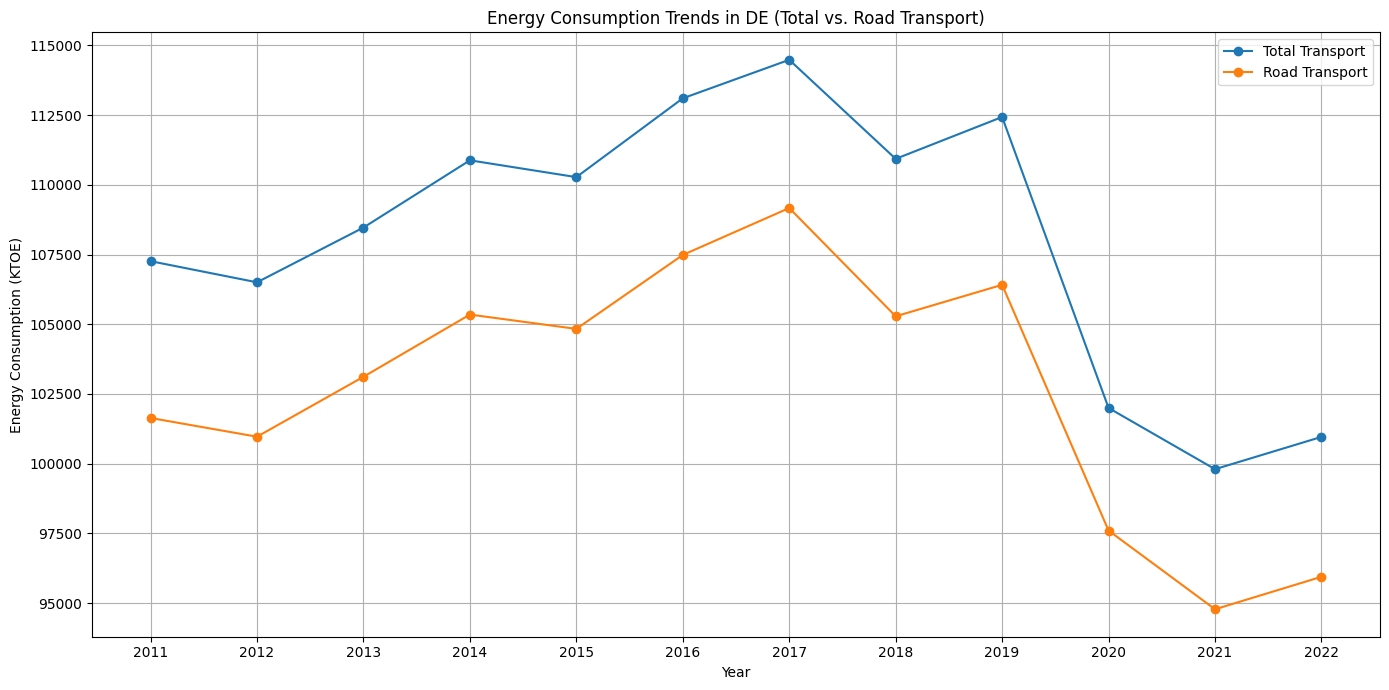

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load data
fect_total_df = load_data('../data/energy_consumption.db',
                          'SELECT * FROM FECT_Total')
fect_road_df = load_data(
    '../data/energy_consumption.db', 'SELECT * FROM FECT_Road')

# Filter data for a specific country
country = 'DE'  # Germany
total_df_country = fect_total_df[fect_total_df['geographic_area'] == country]
road_df_country = fect_road_df[fect_road_df['geographic_area'] == country]

# Aggregate data by year
total_consumption_summary = total_df_country.groupby(total_df_country['time_period'].str[:4]).agg({
    'energy_consumption_value': 'sum'
}).reset_index()
total_consumption_summary.columns = ['Year', 'Total_Consumption']

road_consumption_summary = road_df_country.groupby(road_df_country['time_period'].str[:4]).agg({
    'energy_consumption_value': 'sum'
}).reset_index()
road_consumption_summary.columns = ['Year', 'Road_Consumption']

# Merge dataframes
merged_df = pd.merge(total_consumption_summary,
                     road_consumption_summary, on='Year')

# Plotting the trends
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Year'], merged_df['Total_Consumption'],
         marker='o', label='Total Transport')
plt.plot(merged_df['Year'], merged_df['Road_Consumption'],
         marker='o', label='Road Transport')
plt.title(f'Energy Consumption Trends in {country} (Total vs. Road Transport)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (KTOE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Overall Trends:
* Both total and road transport energy consumption show a decline from 2018 onwards.
* Peaks occur around 2017-2018, with a significant drop in 2020. (Due to COVID-19 pandemic)

### Comparison:
* Total transport energy consumption is consistently higher than road transport.
* The gap between total and road transport remains relatively stable, indicating road transport as a major component of total transport energy consumption.


## Analysis of Fuel Type Consumption in Germany

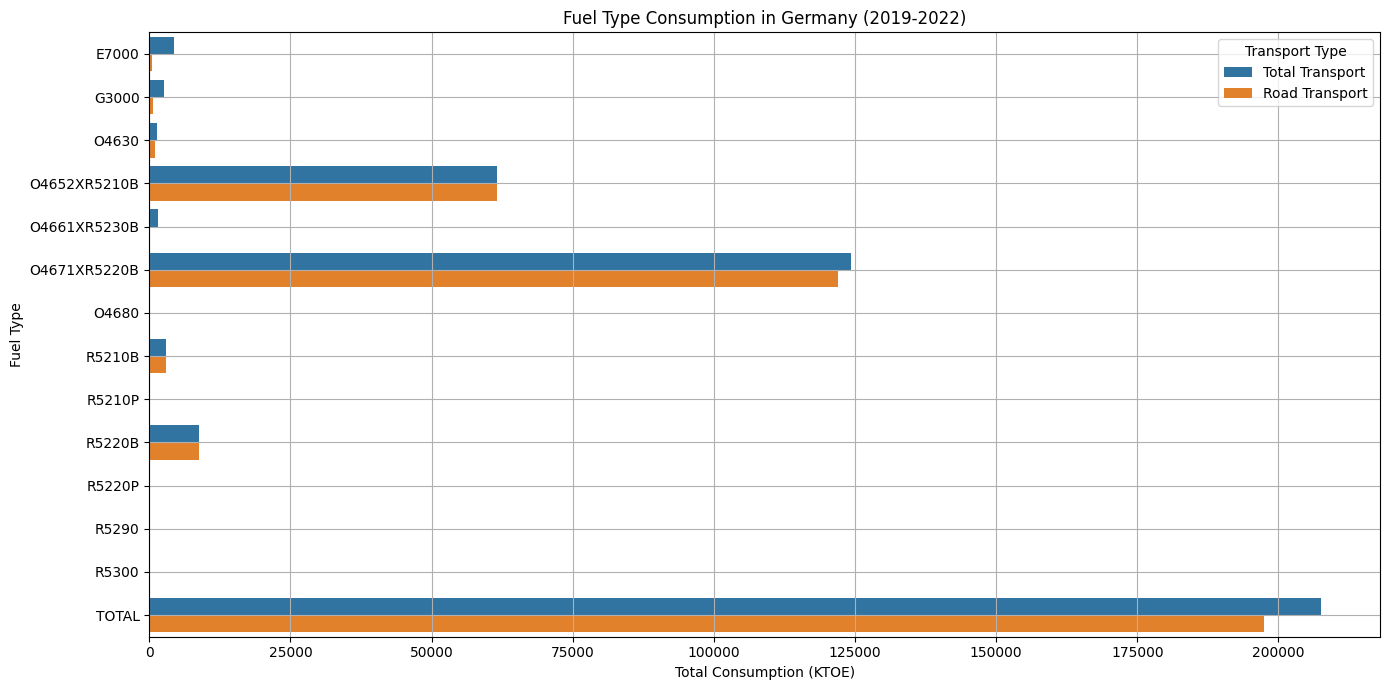

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load data
fect_total_df = load_data('../data/energy_consumption.db',
                          'SELECT * FROM FECT_Total')
fect_road_df = load_data(
    '../data/energy_consumption.db', 'SELECT * FROM FECT_Road')

# Filter data for Germany (DE)
country = 'DE'
total_df_country = fect_total_df[fect_total_df['geographic_area'] == country]
road_df_country = fect_road_df[fect_road_df['geographic_area'] == country]

# Filter data for the years 2019, 2020, 2021, and 2022
years = ['2019', '2020', '2021', '2022']
filtered_total_df_country = total_df_country[total_df_country['time_period'].str[:4].isin(
    years)]
filtered_road_df_country = road_df_country[road_df_country['time_period'].str[:4].isin(
    years)]

# Aggregate data by specific energy product (fuel type)
total_fuel_type_summary = filtered_total_df_country.groupby('specific_energy_product').agg({
    'energy_consumption_value': 'sum'
}).reset_index()

road_fuel_type_summary = filtered_road_df_country.groupby('specific_energy_product').agg({
    'energy_consumption_value': 'sum'
}).reset_index()

# Rename columns for clarity
total_fuel_type_summary.columns = ['Fuel_Type', 'Total_Consumption']
road_fuel_type_summary.columns = ['Fuel_Type', 'Road_Consumption']

# Combine total and road transport data
total_fuel_type_summary['Transport_Type'] = 'Total Transport'
road_fuel_type_summary['Transport_Type'] = 'Road Transport'
road_fuel_type_summary = road_fuel_type_summary.rename(
    columns={'Road_Consumption': 'Total_Consumption'})

combined_df = pd.concat([total_fuel_type_summary[['Fuel_Type', 'Total_Consumption', 'Transport_Type']],
                         road_fuel_type_summary[['Fuel_Type', 'Total_Consumption', 'Transport_Type']]])

# Plotting the bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=combined_df, x='Total_Consumption',
            y='Fuel_Type', hue='Transport_Type')
plt.title('Fuel Type Consumption in Germany (2019-2022)')
plt.xlabel('Total Consumption (KTOE)')
plt.ylabel('Fuel Type')
plt.legend(title='Transport Type')
plt.grid(True)
plt.tight_layout()
plt.show()

## Analysis of Top 5 Fuel Type Consumption in Germany (2011-2022)

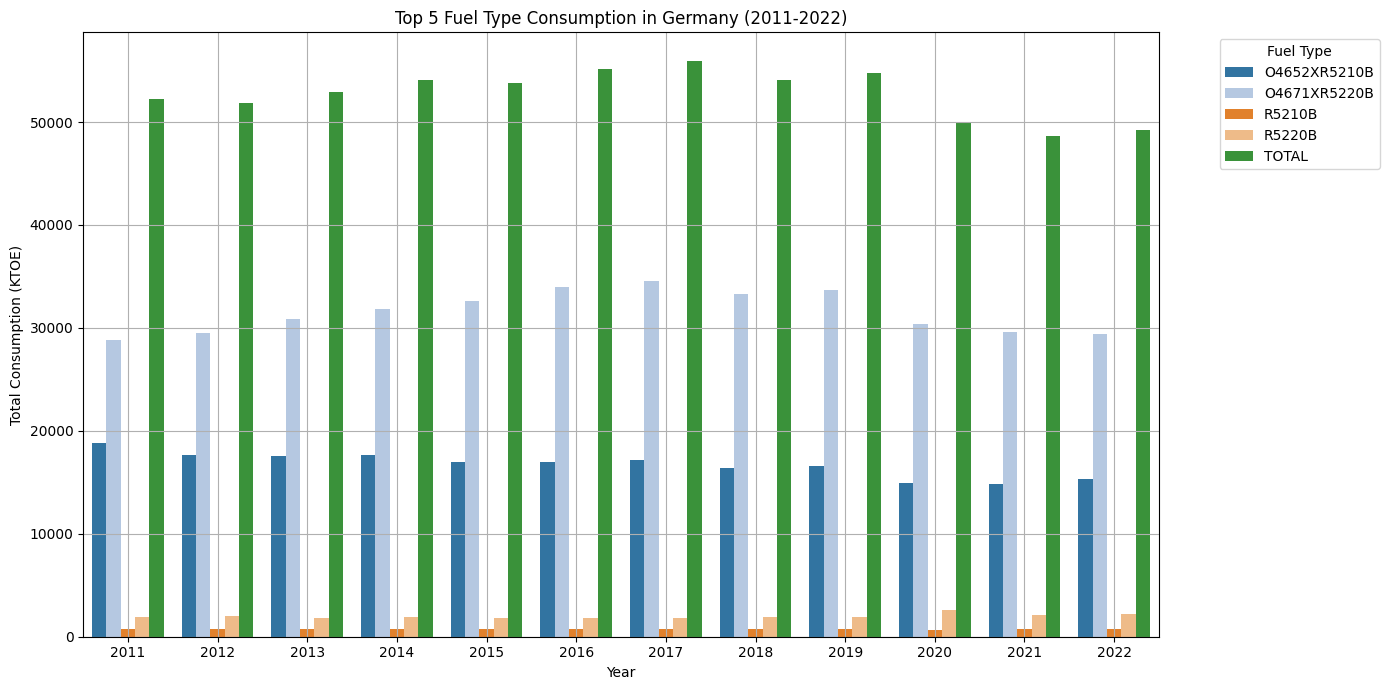

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load data
fect_total_df = load_data('../data/energy_consumption.db',
                          'SELECT * FROM FECT_Total')
fect_road_df = load_data(
    '../data/energy_consumption.db', 'SELECT * FROM FECT_Road')

# Filter data for Germany (DE)
country = 'DE'
total_df_country = fect_total_df[fect_total_df['geographic_area'] == country]
road_df_country = fect_road_df[fect_road_df['geographic_area'] == country]


# Filter data for the years 2011 to 2022
years = [str(year) for year in range(2011, 2023)]
filtered_total_df_country = total_df_country[total_df_country['time_period'].str[:4].isin(
    years)]
filtered_road_df_country = road_df_country[road_df_country['time_period'].str[:4].isin(
    years)]

# Aggregate data by specific energy product (fuel type) and year
total_fuel_type_summary = filtered_total_df_country.groupby(['specific_energy_product', filtered_total_df_country['time_period'].str[:4]]).agg({
    'energy_consumption_value': 'sum'
}).reset_index()

road_fuel_type_summary = filtered_road_df_country.groupby(['specific_energy_product', filtered_road_df_country['time_period'].str[:4]]).agg({
    'energy_consumption_value': 'sum'
}).reset_index()

# Rename columns for clarity
total_fuel_type_summary.columns = ['Fuel_Type', 'Year', 'Total_Consumption']
road_fuel_type_summary.columns = ['Fuel_Type', 'Year', 'Road_Consumption']

# Combine total and road transport data
total_fuel_type_summary['Transport_Type'] = 'Total Transport'
road_fuel_type_summary['Transport_Type'] = 'Road Transport'
road_fuel_type_summary = road_fuel_type_summary.rename(
    columns={'Road_Consumption': 'Total_Consumption'})

combined_df = pd.concat([total_fuel_type_summary, road_fuel_type_summary])

# Calculate total consumption for each fuel type and sort
total_fuel_consumption = combined_df.groupby(
    'Fuel_Type')['Total_Consumption'].sum().sort_values(ascending=False)

# Select the top 5 most used fuel types
top_5_fuel_types = total_fuel_consumption.head(5).index

# Filter the combined dataframe to include only the top 5 fuel types
top_5_combined_df = combined_df[combined_df['Fuel_Type'].isin(
    top_5_fuel_types)]

# Plotting the stacked bar chart for top 5 fuel types
plt.figure(figsize=(14, 7))
sns.barplot(data=top_5_combined_df, x='Year', y='Total_Consumption',
            hue='Fuel_Type', errorbar=None, palette='tab20')
plt.title('Top 5 Fuel Type Consumption in Germany (2011-2022)')
plt.xlabel('Year')
plt.ylabel('Total Consumption (KTOE)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Dominant Fuel:
* Motor gasoline and Gas oil and diesel oil are the next most significant fuels.

### Stable Trends:
* Motor gasoline and Gas oil and diesel oil show stable usage over the years.
* Blended biogasoline and Blended biodiesels have consistently low usage.


## The heatmaps provide a visual representation of energy consumption for various fuel types across different countries from 2011 to 2022, both for total transport and road transport.

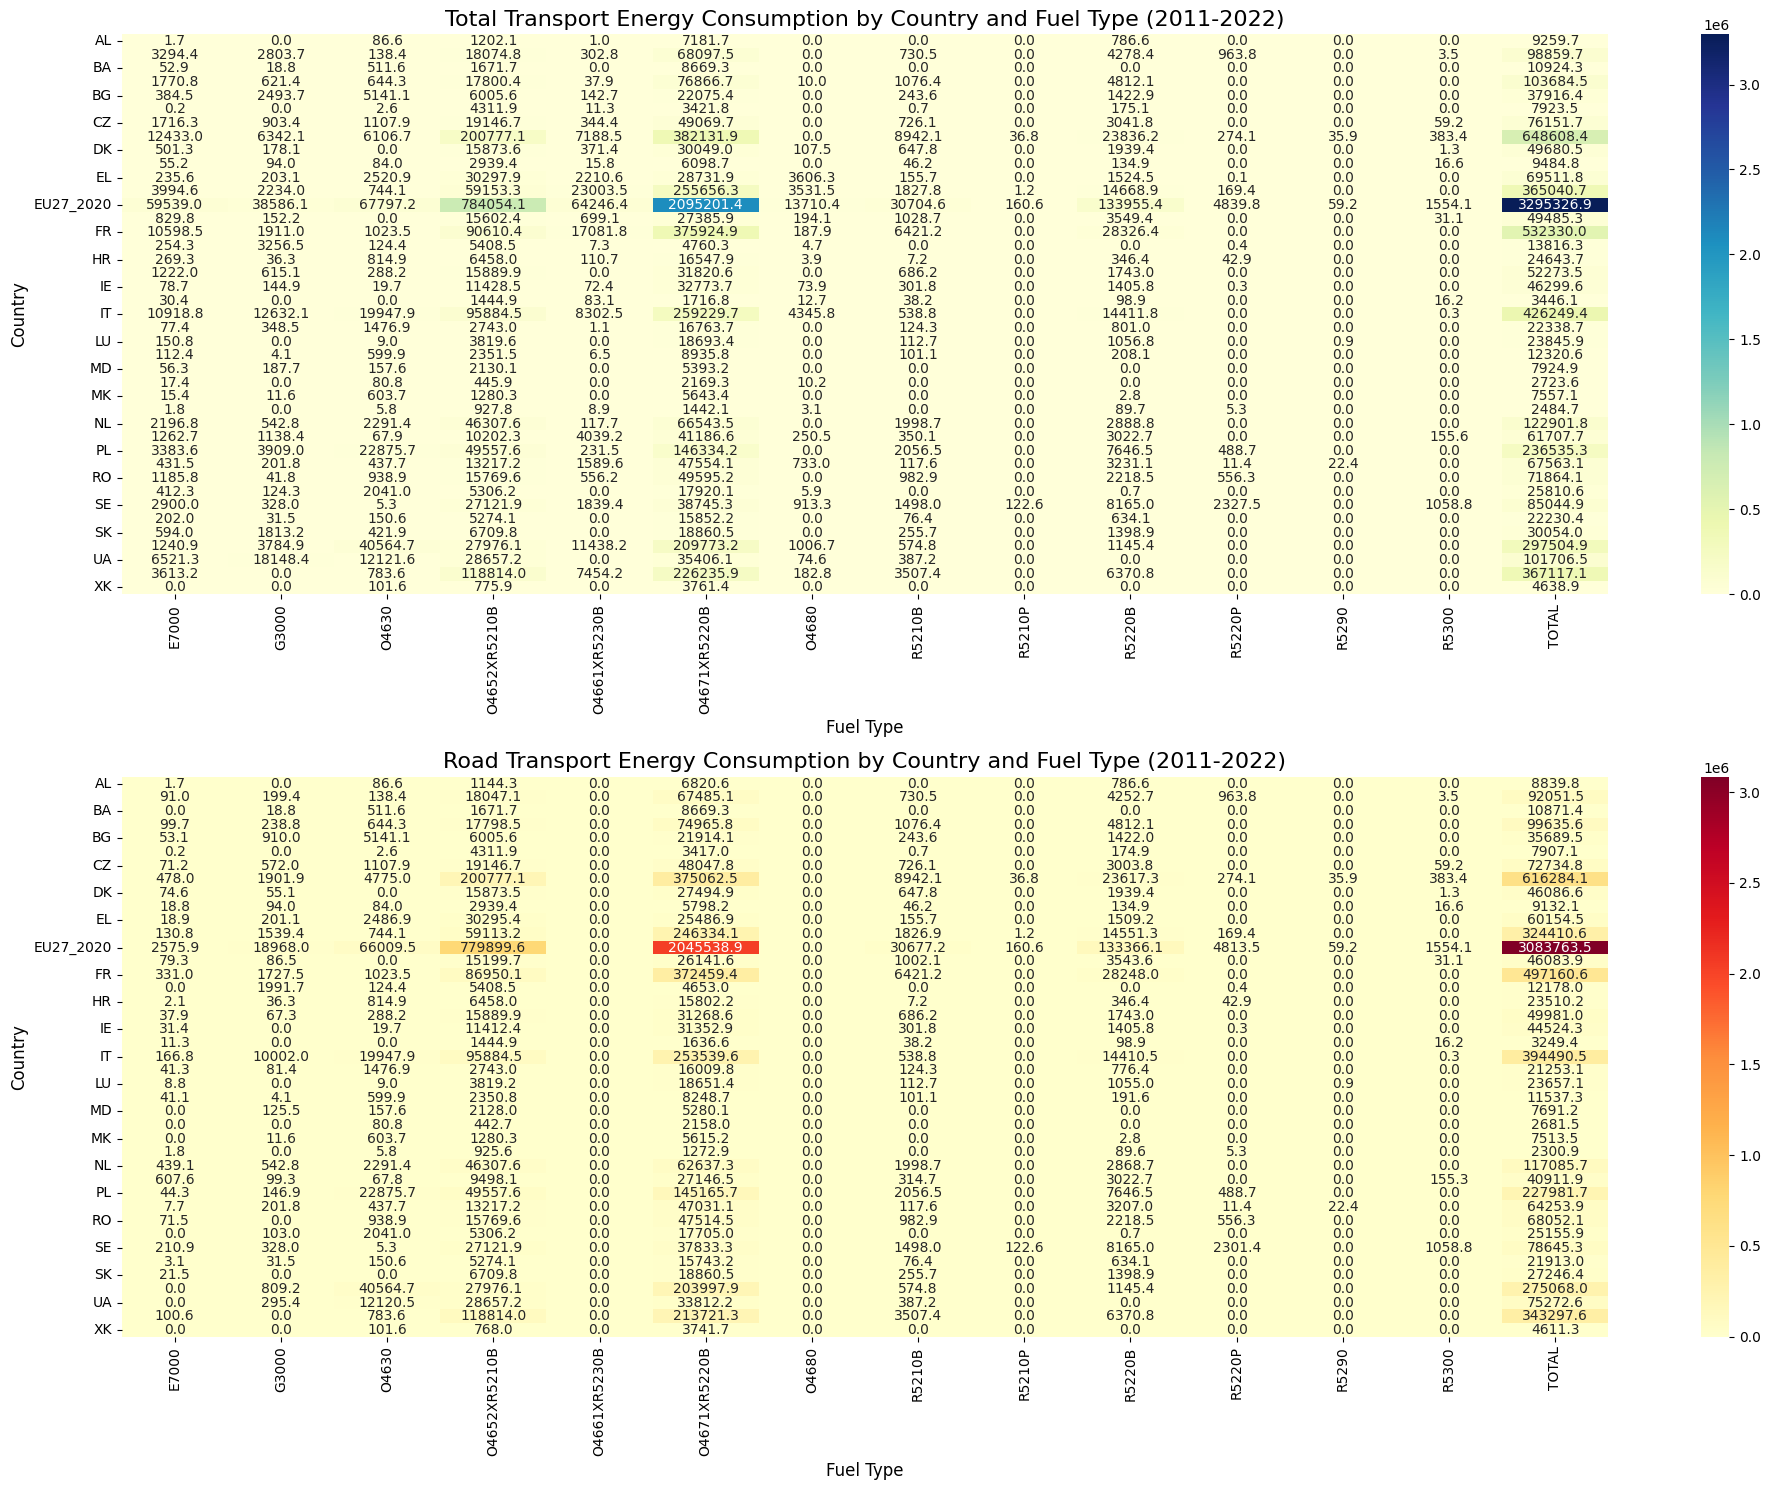

In [60]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('../data/energy_consumption.db')

# Query total energy consumption by country and fuel type
query_total = """
SELECT geographic_area, specific_energy_product, SUM(energy_consumption_value) AS total_energy_consumption
FROM FECT_Total
WHERE time_period >= '2011-01-01 00:00:00' AND time_period <= '2022-12-31 23:59:59'
GROUP BY geographic_area, specific_energy_product
"""

# Query road transport energy consumption by country and fuel type
query_road = """
SELECT geographic_area, specific_energy_product, SUM(energy_consumption_value) AS road_energy_consumption
FROM FECT_Road
WHERE time_period >= '2011-01-01 00:00:00' AND time_period <= '2022-12-31 23:59:59'
GROUP BY geographic_area, specific_energy_product
"""

# Load data into DataFrames
df_total = pd.read_sql_query(query_total, conn)
df_road = pd.read_sql_query(query_road, conn)

# Merge DataFrames on geographic_area and specific_energy_product
df_merged = pd.merge(df_total, df_road, on=[
                     'geographic_area', 'specific_energy_product'], how='outer').fillna(0)

# Create pivot tables for heatmap
pivot_total = df_merged.pivot_table(
    index='geographic_area', columns='specific_energy_product', values='total_energy_consumption')
pivot_road = df_merged.pivot_table(
    index='geographic_area', columns='specific_energy_product', values='road_energy_consumption')

# Plotting heatmaps
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

# Total Transport Heatmap
sns.heatmap(pivot_total, annot=True, fmt=".1f", cmap="YlGnBu", ax=axs[0])
axs[0].set_title(
    'Total Transport Energy Consumption by Country and Fuel Type (2011-2022)', fontsize=16)
axs[0].set_xlabel('Fuel Type', fontsize=12)
axs[0].set_ylabel('Country', fontsize=12)

# Road Transport Heatmap
sns.heatmap(pivot_road, annot=True, fmt=".1f", cmap="YlOrRd", ax=axs[1])
axs[1].set_title(
    'Road Transport Energy Consumption by Country and Fuel Type (2011-2022)', fontsize=16)
axs[1].set_xlabel('Fuel Type', fontsize=12)
axs[1].set_ylabel('Country', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

# Close database connection
conn.close()

### Dominant Fuel Types:
* Both in total transport and road transport, the fuel types Motor gasoline and Gas oil and diesel oil are the most prominent across multiple countries. 
Other fuel types like Blended biodiesels and Blended biogasoline also show significant consumption but to a lesser extent.

### Country-Specific Insights:
* Germany (DE), France (FR), and Italy (IT) consistently show high energy consumption values for both total and road transport. This suggests that these countries have substantial transport activities contributing to overall energy use.
European Union - 27 countries also shows high consumption, indicating a collective high use of transport energy within the EU.

### Overall Trends:
* The trends show a strong correlation between the fuel types used in both total and road transport, with certain countries and fuel types standing out consistently.


## Conclusions:

The analysis reveals that road transport consistently accounts for a significant portion of total transport energy consumption across various countries, particularly in Germany, France, and Italy. This dominance has profound climate implications due to the heavy reliance on fossil fuels like motor gasoline and diesel oil, which are major sources of greenhouse gas emissions. The trends from 2011 to 2022 show a strong correlation between total and road transport energy use, with notable peaks around 2017-2018 and a sharp decline in 2020, likely due to the COVID-19 pandemic. This underscores the urgent need for targeted policies to reduce emissions by transitioning to cleaner energy sources, improving fuel efficiency, and promoting alternative transport modes. However, the analysis is limited by the scope of available data and does not account for all factors influencing energy consumption, suggesting the need for further research to fully understand and address the transport sector's impact on climate change.

## Refernces

**[1]**: https://ec.europa.eu/eurostat/databrowser/view/ten00126/default/table?lang=en&category=cli.cli_dri.cli_dri_tran
